# iGnosis Tech - Assigment Task

The marketing department needs some help in focussing on the most important market segment.Instead of marketing to everyone,
they need our help in identifying who our most profitable customers are.

Are they married or unmarried, working or retired, premium or budget buyers etc… This will help them position things better.
Also, they need help in identifying the bestselling products. 

So, given the transaction data, help us identify the top 3 most profitable products and characteristics of our most loyal customers.  Also include your hypothesis of why you think the loyal customers like


Dataset Link : https://drive.google.com/drive/folders/1JLHEIQp95b6Jo3iiXGYfIdKUrs8uWJn1?usp=sharing

## Importing the required libraries

In [4]:
pip install dash

Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install jupyter_dash

Note: you may need to restart the kernel to use updated packages.


In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from dash import Dash
from dash import dcc, html
from jupyter_dash import JupyterDash

In [7]:
purchase = pd.read_csv("purchase_behaviour.csv")
transaction = pd.read_csv("transaction_data.csv")

In [8]:
purchase.head()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream


In [9]:
transaction.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


In [10]:
print(purchase.shape)
print(transaction.shape)

(72637, 3)
(264836, 8)


## Merging both the files on LYLTY_CARD_NBR ;

In [12]:
# Merge on LYLTY_CARD_NBR
merged_df = transaction.merge(purchase, on="LYLTY_CARD_NBR", how="inner")

In [13]:
null_summary = merged_df.isnull().sum()
duplicate_count = merged_df.duplicated().sum()

In [14]:
print(f"Shape of merged data: {merged_df.shape}")
print(f"\nMissing values per column:\n{null_summary}")
print(f"\nNumber of duplicate rows: {duplicate_count}")

Shape of merged data: (264836, 10)

Missing values per column:
DATE                0
STORE_NBR           0
LYLTY_CARD_NBR      0
TXN_ID              0
PROD_NBR            0
PROD_NAME           0
PROD_QTY            0
TOT_SALES           0
LIFESTAGE           0
PREMIUM_CUSTOMER    0
dtype: int64

Number of duplicate rows: 1


In [15]:
merged_df.drop_duplicates(inplace=True)

In [16]:
merged_df.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,LIFESTAGE,PREMIUM_CUSTOMER
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,YOUNG SINGLES/COUPLES,Premium
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,MIDAGE SINGLES/COUPLES,Budget
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,MIDAGE SINGLES/COUPLES,Budget
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,MIDAGE SINGLES/COUPLES,Budget
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,MIDAGE SINGLES/COUPLES,Budget


In [17]:
merged_df.describe(include='all')

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,LIFESTAGE,PREMIUM_CUSTOMER
count,264835.000000,264835.000000,2.648350e+05,2.648350e+05,264835.000000,264835,264835.000000,264835.000000,264835,264835
unique,NaN,NaN,NaN,NaN,NaN,114,NaN,NaN,7,3
top,NaN,NaN,NaN,NaN,NaN,Kettle Mozzarella Basil & Pesto 175g,NaN,NaN,OLDER SINGLES/COUPLES,Mainstream
freq,NaN,NaN,NaN,NaN,NaN,3304,NaN,NaN,54478,101988
mean,43464.036600,135.080216,1.355496e+05,1.351584e+05,56.583201,NaN,1.907308,7.304205,NaN,NaN
std,105.389336,76.784306,8.058011e+04,7.813316e+04,32.826692,NaN,0.643655,3.083231,NaN,NaN
min,43282.000000,1.000000,1.000000e+03,1.000000e+00,1.000000,NaN,1.000000,1.500000,NaN,NaN
25%,43373.000000,70.000000,7.002100e+04,6.760100e+04,28.000000,NaN,2.000000,5.400000,NaN,NaN
50%,43464.000000,130.000000,1.303580e+05,1.351380e+05,56.000000,NaN,2.000000,7.400000,NaN,NaN
75%,43555.000000,203.000000,2.030945e+05,2.027015e+05,85.000000,NaN,2.000000,9.200000,NaN,NaN


In [18]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 264835 entries, 0 to 264835
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   DATE              264835 non-null  int64  
 1   STORE_NBR         264835 non-null  int64  
 2   LYLTY_CARD_NBR    264835 non-null  int64  
 3   TXN_ID            264835 non-null  int64  
 4   PROD_NBR          264835 non-null  int64  
 5   PROD_NAME         264835 non-null  object 
 6   PROD_QTY          264835 non-null  int64  
 7   TOT_SALES         264835 non-null  float64
 8   LIFESTAGE         264835 non-null  object 
 9   PREMIUM_CUSTOMER  264835 non-null  object 
dtypes: float64(1), int64(6), object(3)
memory usage: 22.2+ MB


In [19]:
merged_df.shape

(264835, 10)

### Statistics/Summary Of The Data ;

* The dataset contains 264835 Entries and 10 Columns :

>> COLUMNWISE DESCRIPTION ;

* DATE - The date of transaction being made or order being placed.

* STORE_NBR - The store associated to a particular Order.

* LYLTY_CARD_NBR - A Unique Loayality Card Identification Number

* TXN_ID - Transactional ID

* PROD_NBR - Serial Number Of the product.

* PROD_NAME - Name of the product.

* PROD_QTY - The Quantity Of products being placed at a single order.

* TOT_SALES - The total number of sales for a partcular product.

* LIFESTAGE - The Age Group Of the customers.

* PREMIUM_CUSTOMER - From which group a customer belongs to - Budget, Mainstream or Premium.


## Top 3 most profitable products

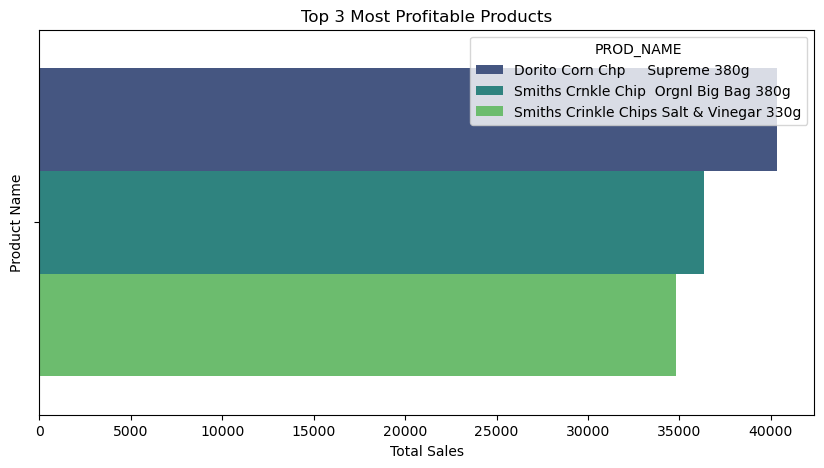

In [22]:
top_products = merged_df.groupby("PROD_NAME")["TOT_SALES"].sum().sort_values(ascending=False).head(3)

# Visualization
plt.figure(figsize=(10, 5))
sns.barplot(x=top_products.values, hue=top_products.index,palette="viridis")
plt.xlabel("Total Sales")
plt.ylabel("Product Name")
plt.title("Top 3 Most Profitable Products")
plt.show()

### Key Observations :

#### TOP 3 MOST PROFITABLE PRODUCTS ARE :

#### 1. DORITO CORN CHIPS (380 GMS.)

#### 2. SMITHS CRINKLE CHIPS , ORIGINALS (380 GMS.)

#### 3. SMITHS CRINKLE CHIPS , SALT & VINEGAR (330 GMS.)

## Identifying the Most Loyal Customers

In [25]:
merged_df['PREMIUM_CUSTOMER'].value_counts()

PREMIUM_CUSTOMER
Mainstream    101988
Budget         93157
Premium        69690
Name: count, dtype: int64

In [26]:
merged_df['LIFESTAGE'].value_counts()

LIFESTAGE
OLDER SINGLES/COUPLES     54478
RETIREES                  49763
OLDER FAMILIES            48596
YOUNG FAMILIES            43592
YOUNG SINGLES/COUPLES     36377
MIDAGE SINGLES/COUPLES    25110
NEW FAMILIES               6919
Name: count, dtype: int64

In [27]:
customer_loyalty = merged_df.groupby(["LIFESTAGE", "PREMIUM_CUSTOMER"]).agg(
    total_spent=("TOT_SALES", "sum"),
    num_transactions=("TXN_ID", "count")
).reset_index()

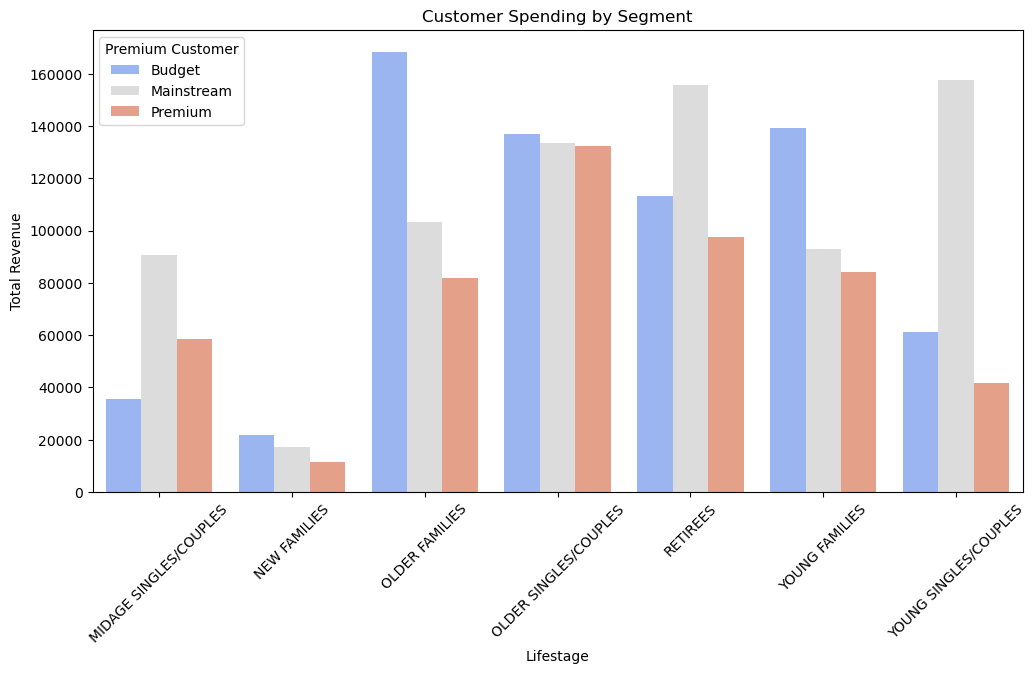

In [28]:
# Visualization - Spending by Customer Segment
plt.figure(figsize=(12, 6))
sns.barplot(data=customer_loyalty, x="LIFESTAGE", y="total_spent", hue="PREMIUM_CUSTOMER", palette="coolwarm")
plt.xticks(rotation=45)
plt.xlabel("Lifestage")
plt.ylabel("Total Revenue")
plt.title("Customer Spending by Segment")
plt.legend(title="Premium Customer")
plt.show()

### Key Obeservations :

#### Older Singles/Couples and Retirees appear to be the most loyal customers, as they contribute the highest total revenue. Their spending is consistent across all premium categories (Budget, Mainstream, and Premium).

#### Older Families also show strong spending habits, particularly among Budget and Mainstream segments.

#### Young Singles/Couples and New Families have the lowest total spending, indicating that they are less frequent or less high-value buyers.

### Most Loyal Customers :

#### Retirees (Mainstream & Budget segments) – They spend the most, likely due to stable disposable income and consistent shopping habits.

#### Older Singles/Couples (All segments) – They exhibit strong purchasing behavior, making them valuable customers to target for loyalty programs or personalized promotions.

#### Older Families (Budget segment) – This group also spends significantly, possibly purchasing in bulk for household needs.

## Data Dashboard 

In [31]:
app = Dash(__name__)

customer_spending = merged_df.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER'])['TOT_SALES'].sum().reset_index()

top_products = merged_df.groupby('PROD_NAME')['TOT_SALES'].sum().reset_index()
top_products = top_products.sort_values(by='TOT_SALES', ascending=False).head(3)

transactions_per_segment = merged_df.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER'])['TXN_ID'].count().reset_index()
transactions_per_segment.rename(columns={'TXN_ID': 'Total Transactions'}, inplace=True)

fig1 = px.bar(customer_spending, 
              x="LIFESTAGE", 
              y="TOT_SALES", 
              color="PREMIUM_CUSTOMER",
              title="Customer Spending by Segment",
              labels={"TOT_SALES": "Total Revenue", "LIFESTAGE": "Lifestage"},
              barmode="group")

fig2 = px.bar(top_products, 
              x="TOT_SALES", 
              y="PROD_NAME", 
              title="Top 3 Best-Selling Products",
              labels={"TOT_SALES": "Total Sales", "PROD_NAME": "Product"},
              orientation='h')

fig3 = px.bar(transactions_per_segment, 
              x="LIFESTAGE", 
              y="Total Transactions", 
              color="PREMIUM_CUSTOMER",
              title="Total Transactions per Customer Segment",
              labels={"Total Transactions": "Number of Transactions", "LIFESTAGE": "Lifestage"},
              barmode="group")

app.layout = html.Div(children=[
    html.H1("Customer Insights Dashboard", style={'textAlign': 'center'}),
    
    html.Div([
        dcc.Graph(figure=fig1),
        dcc.Graph(figure=fig2),
        dcc.Graph(figure=fig3),
    ])
])

if __name__ == '__main__':
    app.run_server(debug=True)

## FINAL TAKEAWAY

### Focus on Loyal Customer Groups: Retirees & Older Singles/Couples should be prioritized in advertising, loyalty programs, and offers.

### Target Budget/Mainstream Buyers: Since they dominate spending, create discount-based loyalty programs for them.

### Leverage Top Products: Promote the top 3 bestselling products via special deals or in-store displays.

### Upsell & Cross-sell: Bundle chips with dips or beverages to encourage higher spending per transaction.

### Optimize Store Layout: Place high-revenue products in high-visibility locations for targeted customer groups.